In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import scipy as si
import os
import scipy.stats as stats
cwd = os.getcwd()
plots = os.path.join(cwd,'plots')
max_anlge = 59.2 #deg



def read_from(data, theta, max_anlge = 59.2):
    time = (data[0] - data[0][0])*1e-6 #time in seconds
    angles = np.array([data[9], data[10]])
    tangents  = np.array([data[7], data[8]])
    quadrants = np.array([data[2], data[3], data[4], data[5]])
    totals = data[6]
    gamma = data[1]/16*0.9
    tan_gamma = np.tan(gamma/180*np.pi)
    # this is true_alpha, true_beta type shape
    true_tangents =  np.array([tan_gamma * np.cos(theta/180*np.pi),- tan_gamma * np.sin(theta/180*np.pi)])
    true_angles = np.array([np.arctan(true_tangents[0])*180/np.pi, np.arctan(true_tangents[1])*180/np.pi])
    # find the limits in which the sun sensor works
    dgsa = (true_angles[0] < max_anlge) & (true_angles[0] > -max_anlge)
    dgsb = (true_angles[1] < max_anlge) & (true_angles[1] > -max_anlge)
    return {"time": time, "quadrants": quadrants, "totals": totals,
            "angles": angles, "tangents": tangents, "true_angles": true_angles,
            "true_tangents": true_tangents, "limits": dgsa & dgsb}

calb_data = [read_from((np.loadtxt(cwd + r'\data\180_1_70max', skiprows=1, delimiter=',')).T, 180),
             read_from((np.loadtxt(cwd + r'\data\135_1_70max', skiprows=1, delimiter=',')).T, 135),
             read_from((np.loadtxt(cwd + r'\data\90_1_70max', skiprows=1, delimiter=',')).T, 90),
             read_from((np.loadtxt(cwd + r'\data\45_1_70max', skiprows=1, delimiter=',')).T, 45)]

test_data = [read_from((np.loadtxt(cwd + r'\data\180_2_70max', skiprows=1, delimiter=',')).T, 180),
             read_from((np.loadtxt(cwd + r'\data\135_2_70max', skiprows=1, delimiter=',')).T, 135),
             read_from((np.loadtxt(cwd + r'\data\90_2_70max', skiprows=1, delimiter=',')).T, 90),
             read_from((np.loadtxt(cwd + r'\data\45_2_70max', skiprows=1, delimiter=',')).T, 45)]

val_data = [read_from((np.loadtxt(cwd + r'\data\180_3_70max', skiprows=1, delimiter=',')).T, 180),
            read_from((np.loadtxt(cwd + r'\data\135_3_70max', skiprows=1, delimiter=',')).T, 135),
            read_from((np.loadtxt(cwd + r'\data\90_3_70max', skiprows=1, delimiter=',')).T, 90),
            read_from((np.loadtxt(cwd + r'\data\45_3_70max', skiprows=1, delimiter=',')).T, 45)]

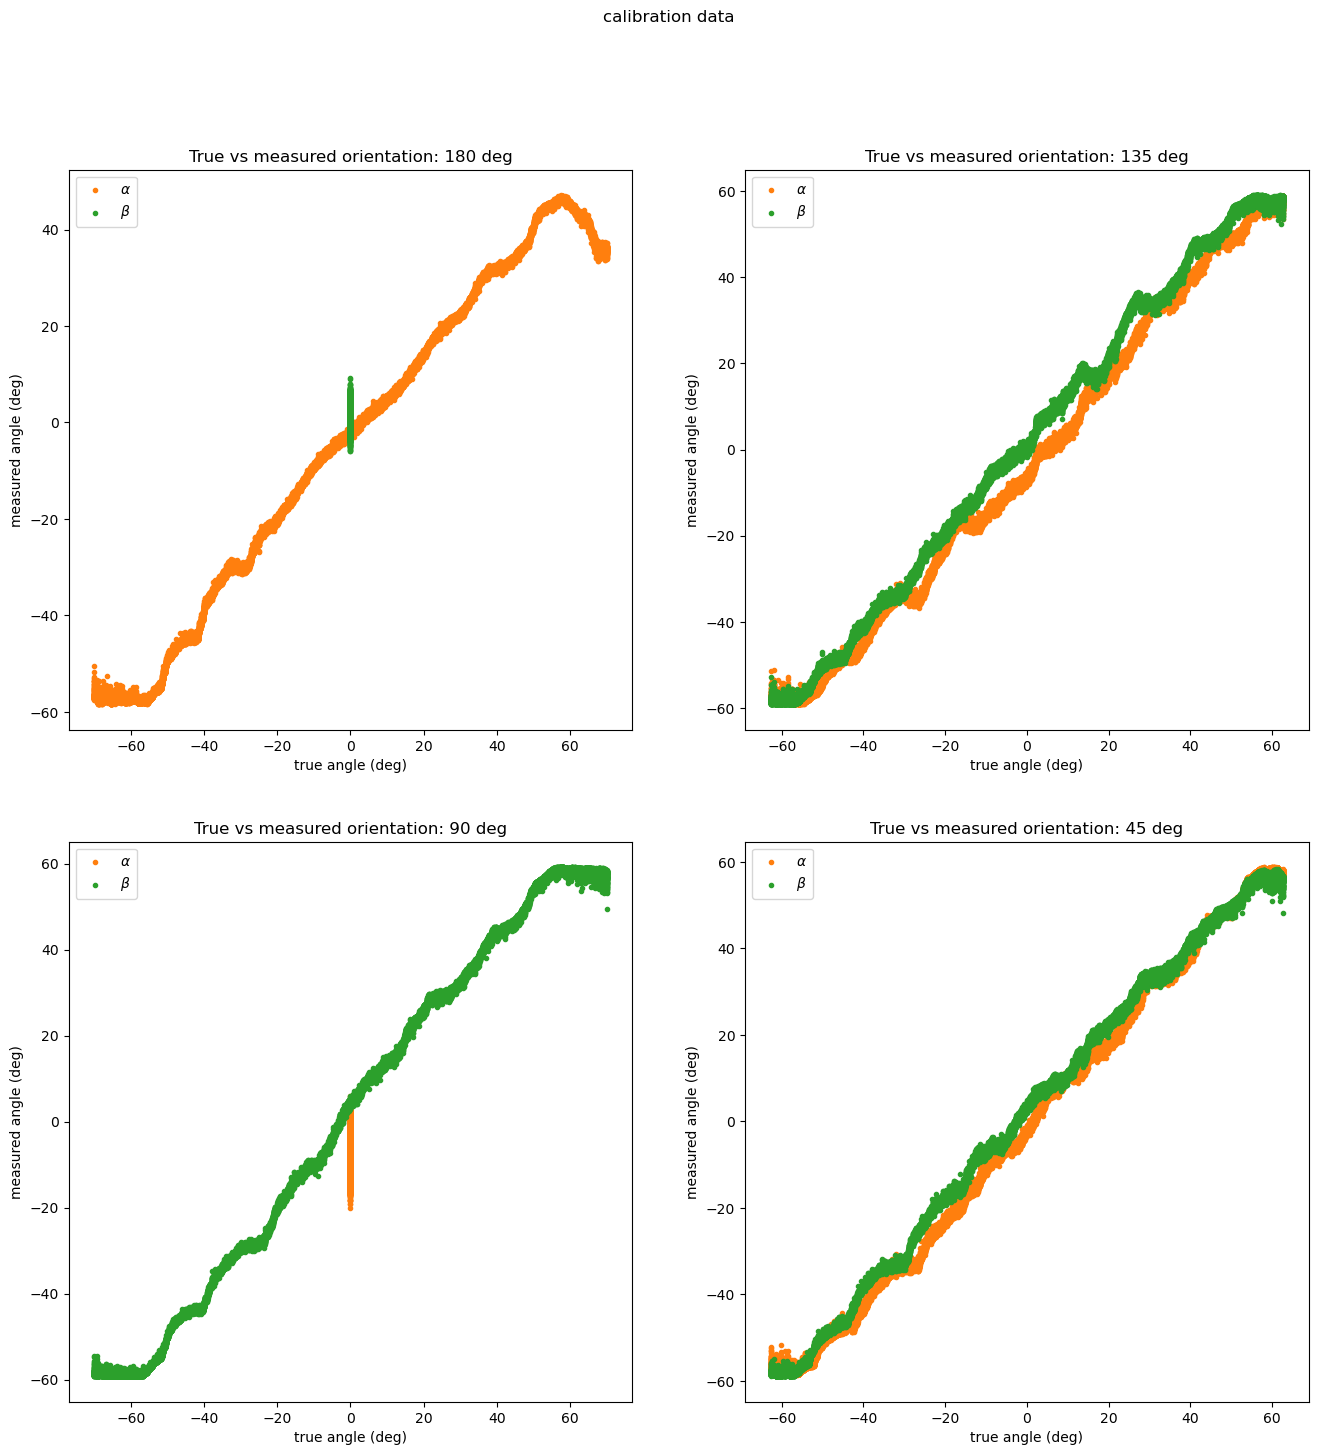

In [2]:
# Plot true vs measured. Use the calibration data of measurement 1
def generic_angles(data_set, title , save = False, path = None):
    # Get the right orientations
    data_180 = data_set[0]
    data_135 = data_set[1]
    data_90 = data_set[2]
    data_45 = data_set[3]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
    fig.suptitle(title)
    ax[0][0].set_title("True vs measured orientation: 180 deg")
    ax[0][0].scatter(data_180["true_angles"][0], data_180["angles"][0], c='tab:orange', marker='.', label=r'$\alpha$')
    ax[0][0].scatter(data_180["true_angles"][1], data_180["angles"][1], c='tab:green', marker='.', label=r'$\beta$')
    ax[0][0].set_xlabel("true angle (deg)")
    ax[0][0].set_ylabel("measured angle (deg)")
    ax[0][0].legend()
    ax[0][1].set_title("True vs measured orientation: 135 deg")
    ax[0][1].scatter(data_135["true_angles"][0], data_135["angles"][0], c='tab:orange', marker='.', label=r'$\alpha$')
    ax[0][1].scatter(data_135["true_angles"][1], data_135["angles"][1], c='tab:green', marker='.', label=r'$\beta$')
    ax[0][1].set_xlabel("true angle (deg)")
    ax[0][1].set_ylabel("measured angle (deg)")
    ax[0][1].legend()
    ax[1][0].set_title("True vs measured orientation: 90 deg")
    ax[1][0].scatter(data_90["true_angles"][0], data_90["angles"][0], c='tab:orange', marker='.', label=r'$\alpha$')
    ax[1][0].scatter(data_90["true_angles"][1], data_90["angles"][1], c='tab:green', marker='.', label=r'$\beta$')
    ax[1][0].set_xlabel("true angle (deg)")
    ax[1][0].set_ylabel("measured angle (deg)")
    ax[1][0].legend()
    ax[1][1].set_title("True vs measured orientation: 45 deg")
    ax[1][1].scatter(data_45["true_angles"][0], data_45["angles"][0], c='tab:orange', marker='.', label=r'$\alpha$')
    ax[1][1].scatter(data_45["true_angles"][1], data_45["angles"][1], c='tab:green', marker='.', label=r'$\beta$')
    ax[1][1].set_xlabel("true angle (deg)")
    ax[1][1].set_ylabel("measured angle (deg)")
    ax[1][1].legend()
    plt.show()
    if save:
        plt.savefig(path)
    plt.close(fig)

generic_angles(calb_data, "calibration data")

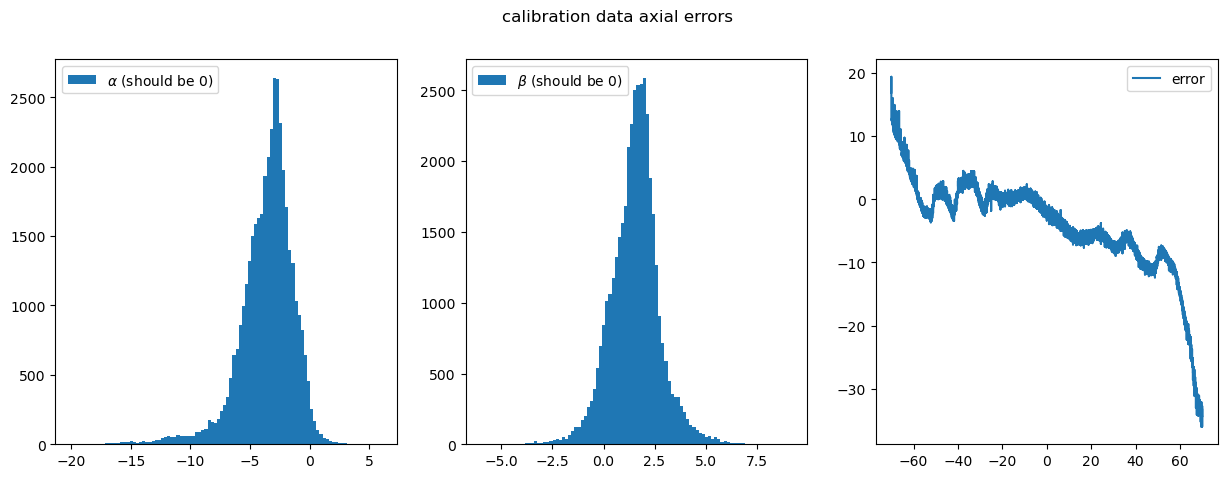

Average error accross


In [3]:
# Also look at the silly behaviour at 0 deg in 90deg orientation
def axis_errors(data_set, title, save = False, path = None):
    data_180 = data_set[0]
    data_90 = data_set[2]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle(title)
    ax[0].hist(data_90["angles"][0],bins=100, label = r"$\alpha$ (should be 0)")
    ax[0].legend()
    ax[1].hist(data_180["angles"][1],bins=100, label = r"$\beta$ (should be 0)")
    ax[1].legend()
    # error as function of angle doesn't matter which you pick
    ax[2].plot(data_180["true_angles"][0],data_180["angles"][0] - data_180["true_angles"][0], label = "error")
    ax[2].legend()
    plt.show()
    if save:
        plt.savefig(path)
    plt.close(fig)
    print("Average error accross")

axis_errors(calb_data, "calibration data axial errors")

Optimize with a bias/offset on the quadcell formula. Obviously, the quadcell can be programmed to have this offset
We now use:
$
    \frac{\tan{\alpha}}{\tan{\alpha_{max}}} = S_a - C_a \\
$
where $S_a$ is the quadcell formula. $\beta$ gets similar treatment. It is now a matter of finding optimal $C_a$ and $C_b$ that must be applicable to every orientation (it shouldn't matter how we place the sun sensor as long as it is properly alligned)

In [16]:
# get the offset coefficient tb used on a test set
def quad_formula(norm_quadrants):
    tan_a = norm_quadrants[0] + norm_quadrants[3] - norm_quadrants[2] - norm_quadrants[1]
    tab_b = norm_quadrants[0] + norm_quadrants[1]  - norm_quadrants[3] - norm_quadrants[2]
    return np.array([tan_a, tab_b])

def get_offset(data_set):
    # since the tangents are only 2 decimal numbers, use the quadrant info
    data_180 = data_set[0]
    data_135 = data_set[1]
    data_90 = data_set[2]
    data_45 = data_set[3]
    prep_quads = lambda data_partition : data_partition["quadrants"][:, data_partition["limits"]]/data_partition["totals"][data_partition["limits"]]
    #prep_tans = lambda data_partition : data_partition["tangents"][:, data_partition["limits"]]
    prep_true_tans = lambda data_partition : data_partition["true_tangents"][:, data_partition["limits"]]
    #tangents = np.hstack((prep_tans(data_180), prep_tans(data_135), prep_tans(data_90), prep_tans(data_45)))
    tangents = np.hstack((quad_formula(prep_quads(data_180)),quad_formula(prep_quads(data_135)),
                                      quad_formula(prep_quads(data_90)),quad_formula(prep_quads(data_45))))
    true_tangents = np.hstack((prep_true_tans(data_180),prep_true_tans(data_135),
                                       prep_true_tans(data_90),prep_true_tans(data_45)))
    loss_a = np.average(tangents[0] - true_tangents[0])
    loss_b = np.average(tangents[1] - true_tangents[1])
    return np.array([loss_a, loss_b])
bias = get_offset(calb_data)

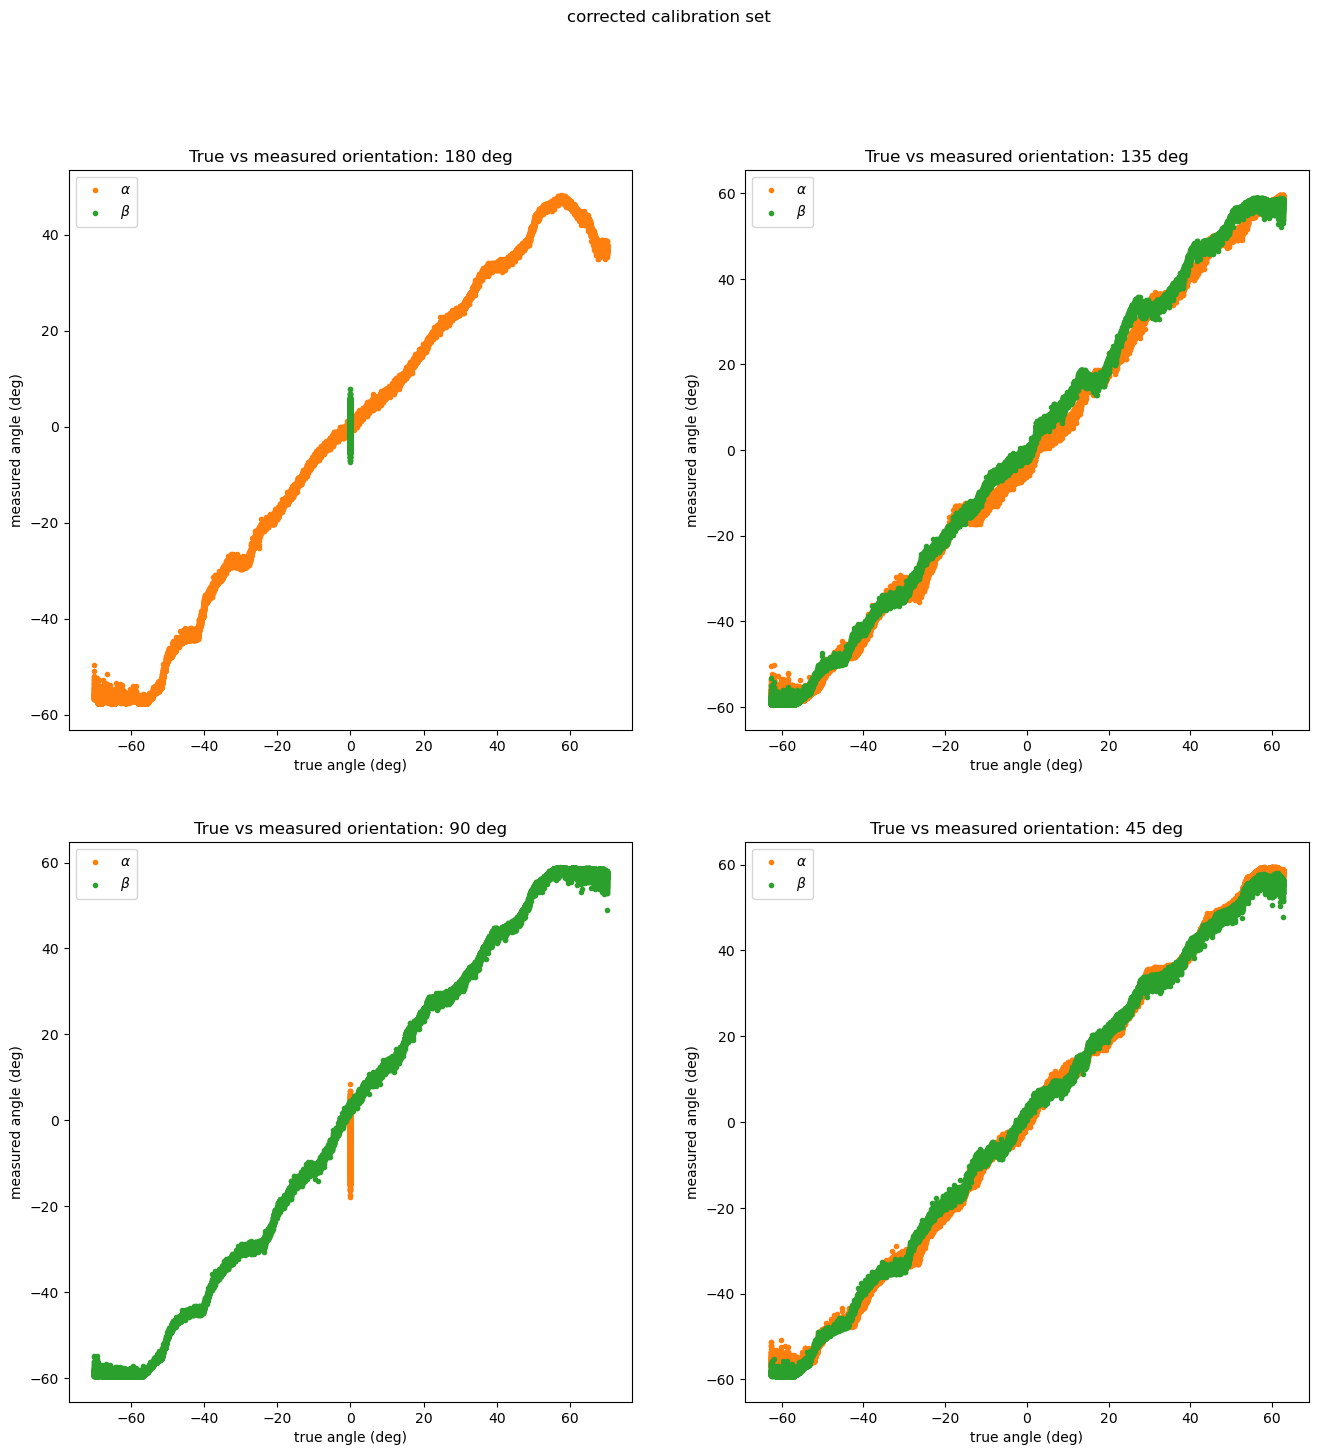

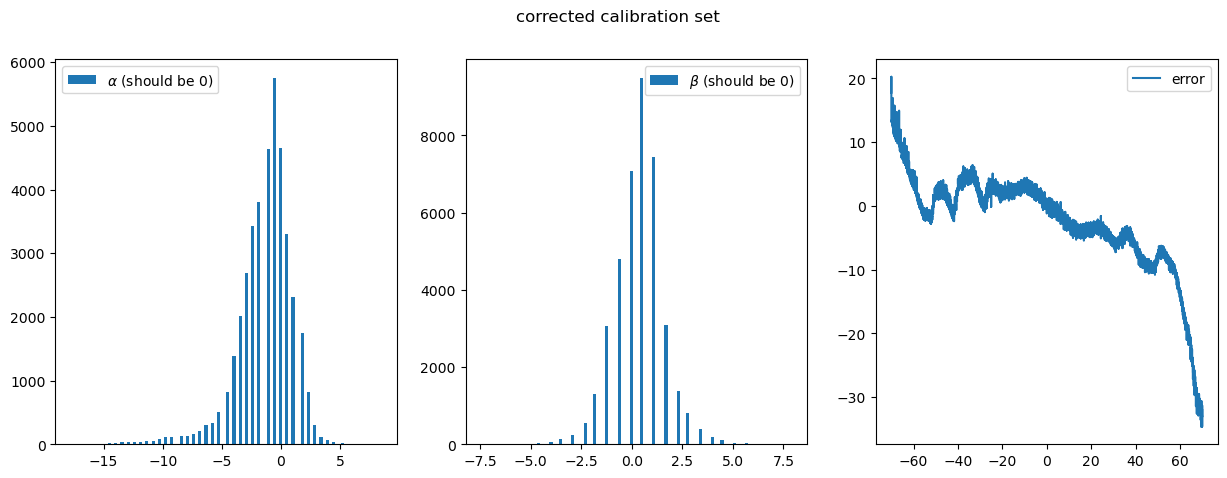

Average error accross


In [17]:
# apply bias on test set and see
def apply_offset(data_set, bias):
    bias = bias.reshape(-1,1)
    # deepcopy is needed or python will just change the og data by reference
    data_180 = copy.deepcopy(data_set[0])
    data_135 = copy.deepcopy(data_set[1])
    data_90 = copy.deepcopy(data_set[2])
    data_45 = copy.deepcopy(data_set[3])
    data_180["tangents"] -= bias
    data_90["tangents"] -= bias
    data_135["tangents"] -= bias
    data_45["tangents"] -= bias
    data_180["angles"] = np.arctan(data_180["tangents"])*180/np.pi
    data_135["angles"] = np.arctan(data_135["tangents"])*180/np.pi
    data_90["angles"] = np.arctan(data_90["tangents"])*180/np.pi
    data_45["angles"] = np.arctan(data_45["tangents"])*180/np.pi
    return [data_180, data_135, data_90, data_45]

corrected_calbset = apply_offset(calb_data, bias)
generic_angles(corrected_calbset, "corrected calibration set")
axis_errors(corrected_calbset, "corrected calibration set")

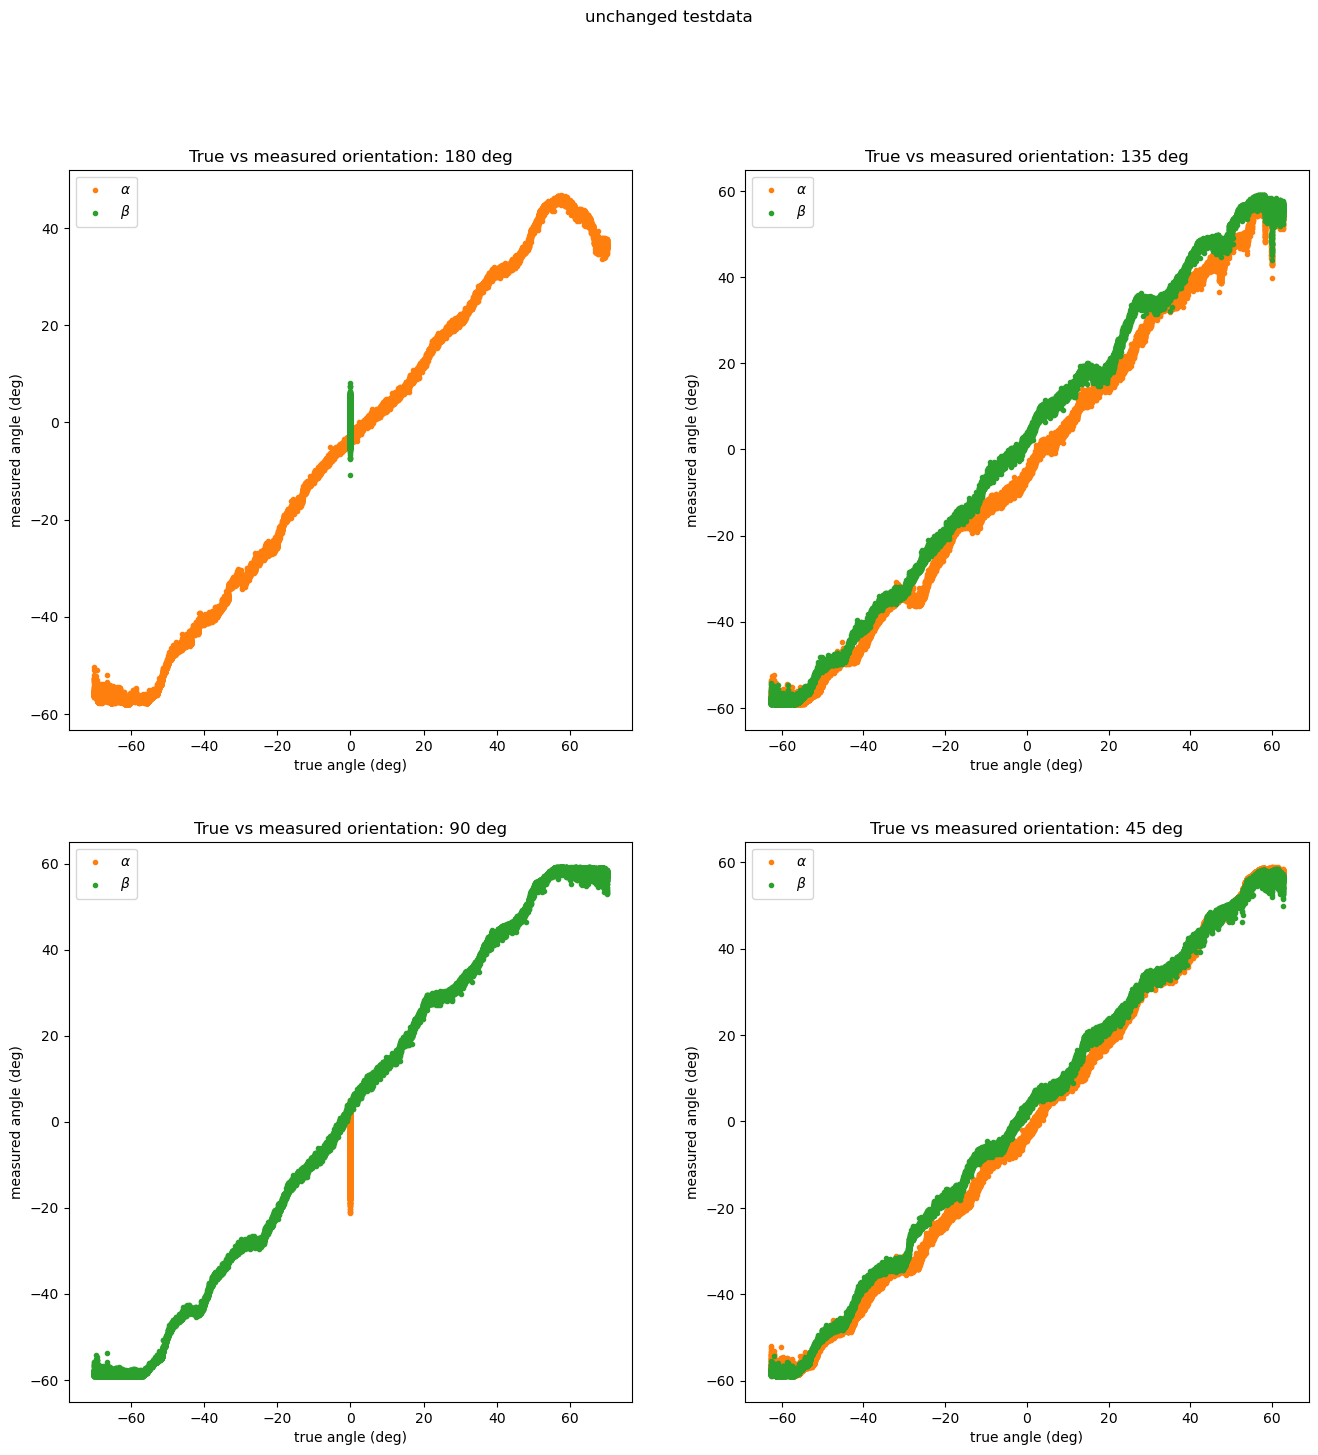

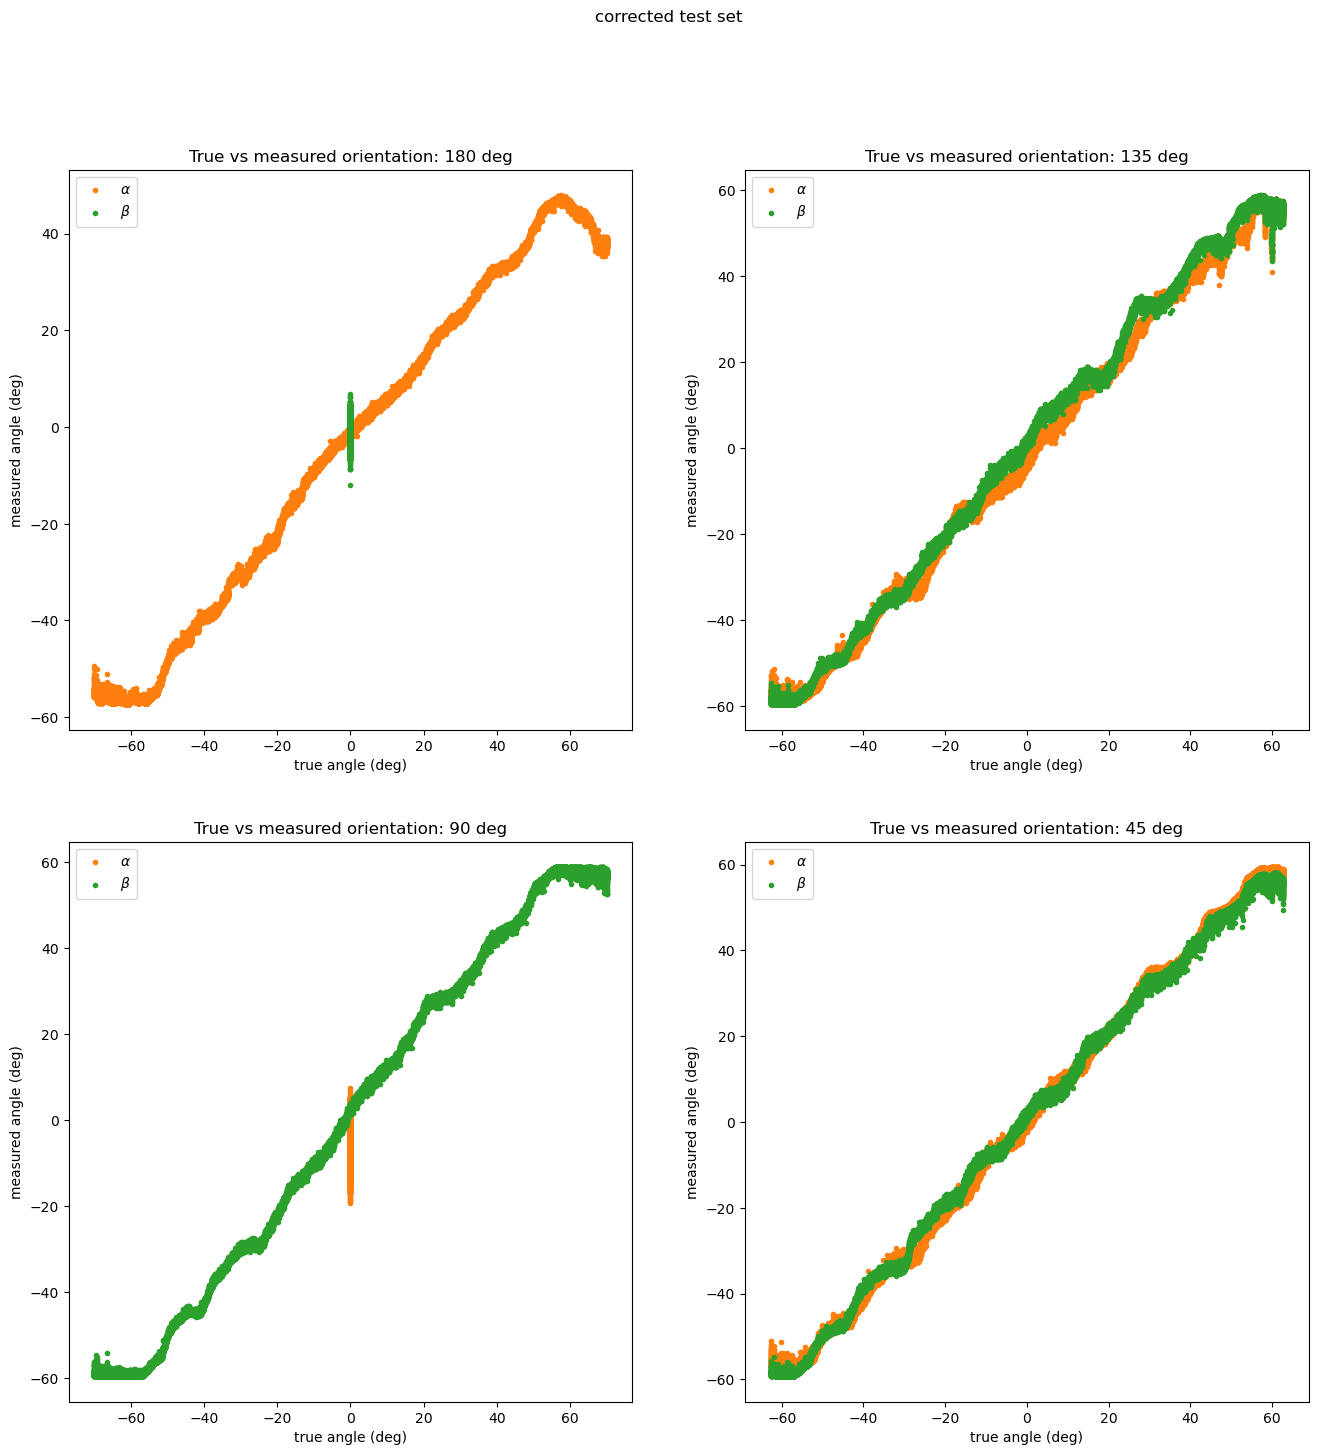

[-0.03947692  0.02092484]


In [18]:
# print casual test set
generic_angles(test_data, "unchanged testdata")
# correct the test data
corrected_testset = apply_offset(test_data, bias)
generic_angles(corrected_testset, "corrected test set")
#corrected_valset = apply_offset(val_data, bias)
#generic_angles(corrected_valset, "corrected valset")
print(bias)

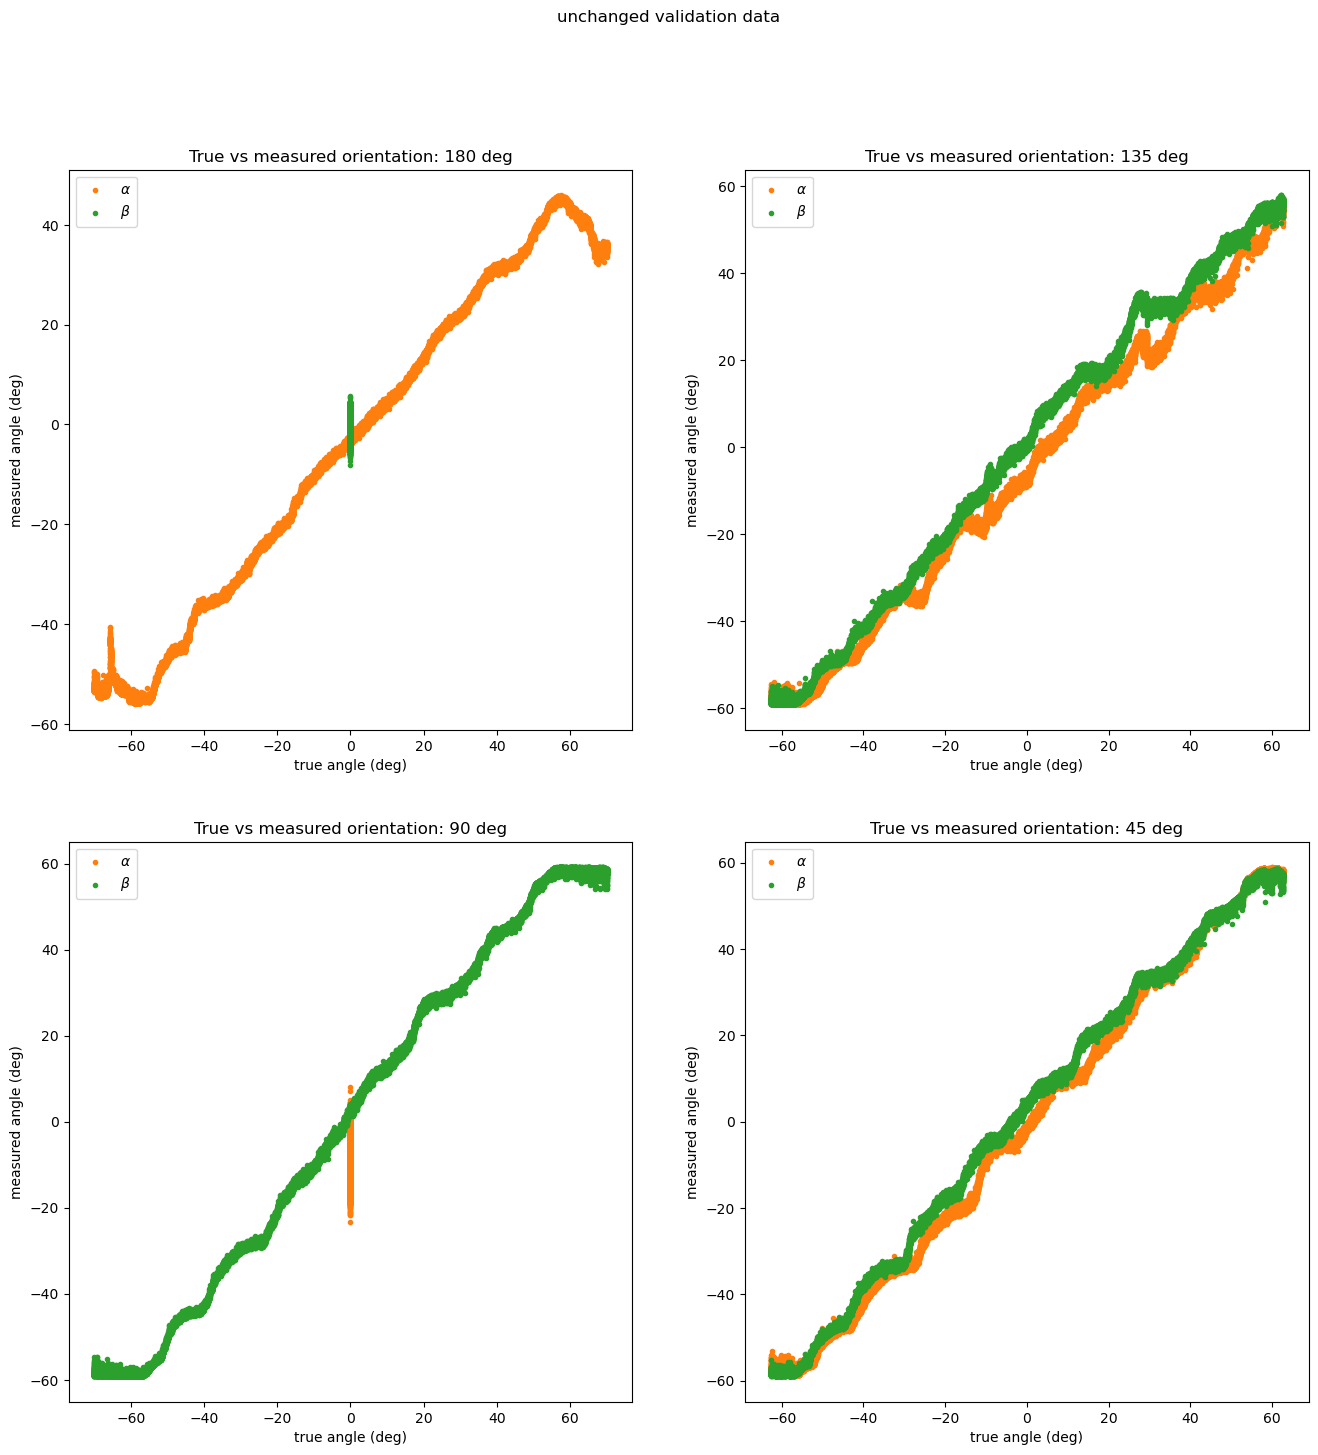

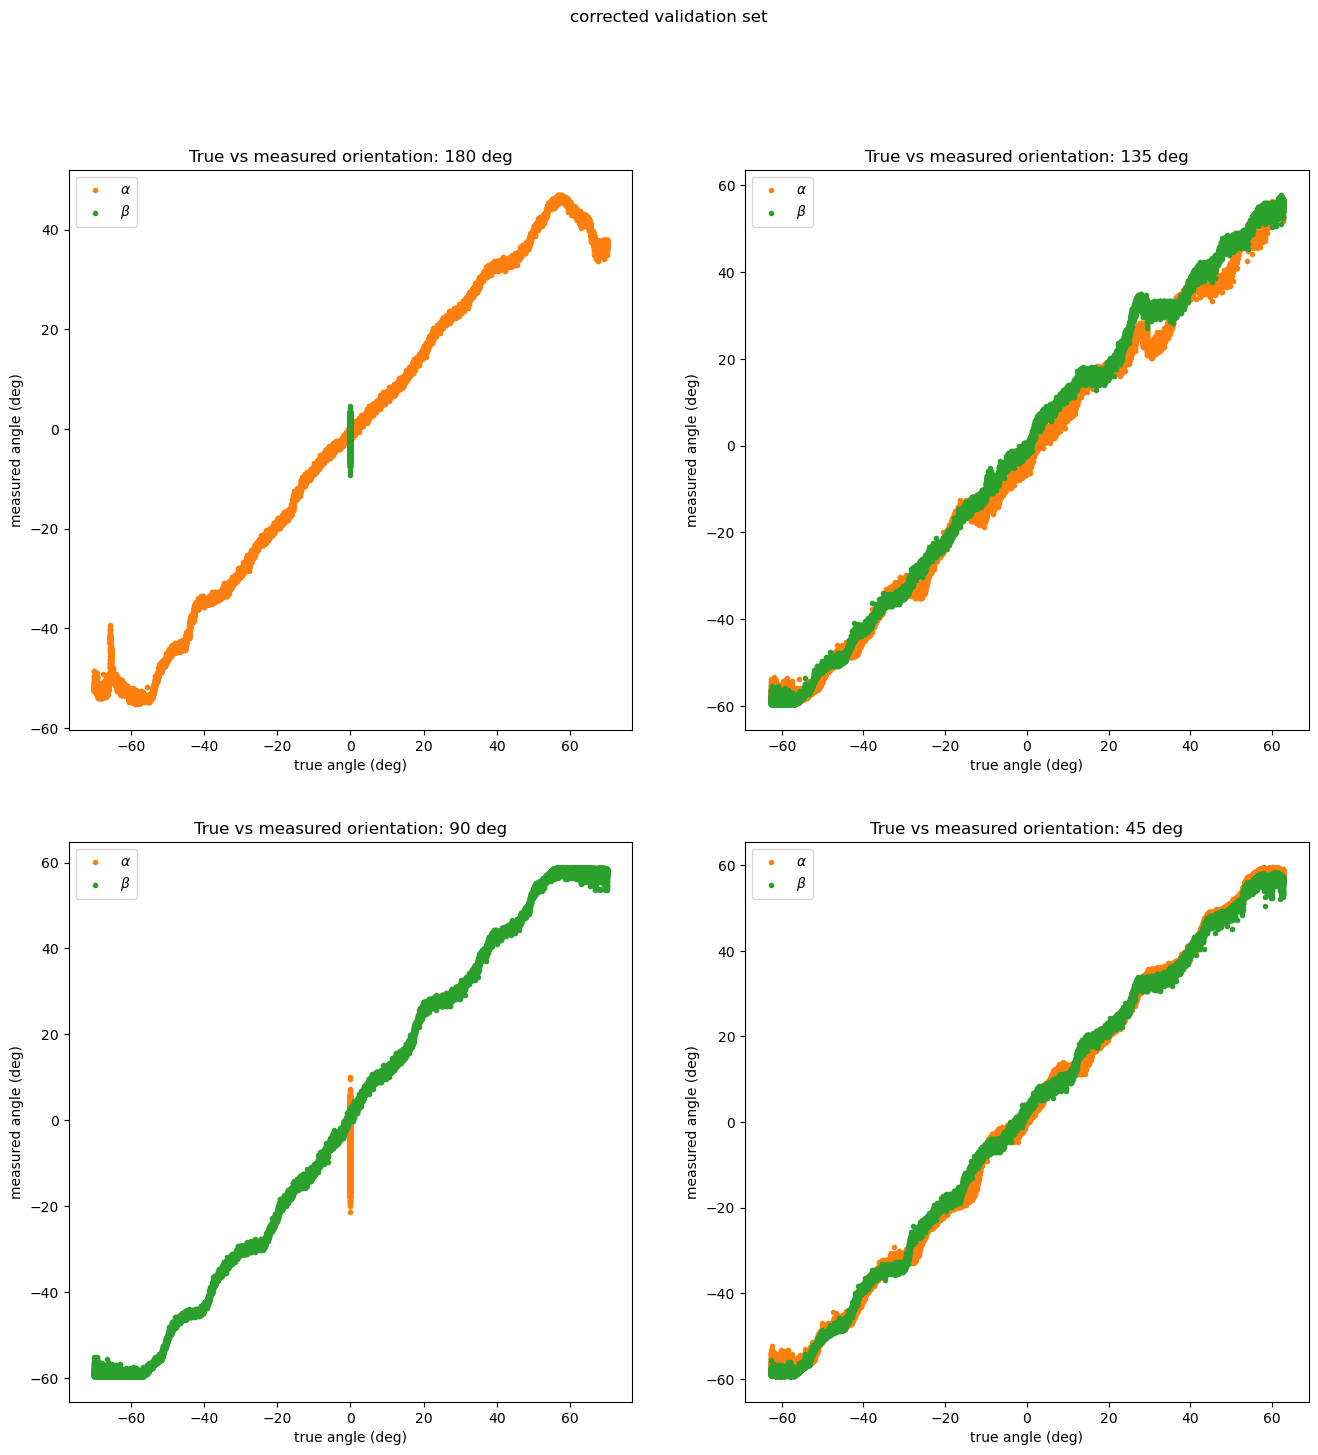

In [19]:
# print the validation data
generic_angles(val_data, "unchanged validation data")
# correct validation data
corrected_valset = apply_offset(val_data, bias)
generic_angles(corrected_valset, "corrected validation set")

Optimize with linear coefficients and bias/offset on the quadcell formula.
Also programmable in arduino

In [59]:
def OLS(data_set, yval = "alpha",regularization = 0.01, add_bias = False):
    # calculate the tangents based on a least squares estimator
    # default data is in transpose form
    assert yval in ["alpha", "beta"], "yval should be alpha or beta"
    if yval == "alpha":
        dig = 0
    elif yval == "beta":
        dig = 1
    prep_quads = lambda data_partition : data_partition["quadrants"][:, data_partition["limits"]]/data_partition["totals"][data_partition["limits"]]
    data_180 = data_set[0]
    data_135 = data_set[1]
    data_90 = data_set[2]
    data_45 = data_set[3]
    quadrant_data_transpose = np.hstack((prep_quads(data_180), prep_quads(data_135), prep_quads(data_90), prep_quads(data_45)))
    prep_true_tans = lambda data_partition : data_partition["true_tangents"][:, data_partition["limits"]]
    true_tangents = np.hstack((prep_true_tans(data_180),prep_true_tans(data_135),prep_true_tans(data_90),prep_true_tans(data_45)))
    if add_bias:
        ones = np.full_like(quadrant_data_transpose[0],1).reshape(1,-1)
        quadrant_data_transpose = np.vstack((quadrant_data_transpose, ones))
    #print(quadrant_data_transpose[:,:10])
    quadrant_data = quadrant_data_transpose.T
    inverted_part = np.linalg.inv(np.dot(quadrant_data_transpose,quadrant_data) + regularization)
    estimator = np.dot(np.dot(inverted_part, quadrant_data_transpose), true_tangents[dig])
    return estimator

def apply_OLS(data_set, ols_a, ols_b, bias = False):
    # use the estimator to predict the tangenst and angles
    # note that to calculate the angles, even out of bounds values are used
    prep_quads = lambda data_partition : data_partition["quadrants"]/data_partition["totals"]
    # yes this should be applied to each data orientation separately
    # bc they must be returned separately
    data_180 = copy.deepcopy(data_set[0])
    data_135 = copy.deepcopy(data_set[1])
    data_90 = copy.deepcopy(data_set[2])
    data_45 = copy.deepcopy(data_set[3])
    quadrants_180_transpose = prep_quads(data_180)
    quadrants_135_transpose = prep_quads(data_135)
    quadrants_90_transpose  = prep_quads(data_90)
    quadrants_45_transpose  = prep_quads(data_45)
    if bias:
        ones_180 = np.full_like(quadrants_180_transpose[0],1).reshape(1,-1)
        ones_135 = np.full_like(quadrants_135_transpose[0],1).reshape(1,-1)
        ones_90 = np.full_like(quadrants_90_transpose[0],1).reshape(1,-1)
        ones_45 = np.full_like(quadrants_45_transpose[0],1).reshape(1,-1)
        quadrants_180_transpose = np.vstack((quadrants_180_transpose, ones_180))
        quadrants_135_transpose = np.vstack((quadrants_135_transpose, ones_135))
        quadrants_90_transpose  = np.vstack((quadrants_90_transpose , ones_90))
        quadrants_45_transpose  = np.vstack((quadrants_45_transpose , ones_45))
    data_180["tangents"] = np.array([np.dot(quadrants_180_transpose.T,ols_a), np.dot(quadrants_180_transpose.T,ols_b)])
    data_135["tangents"] = np.array([np.dot(quadrants_135_transpose.T,ols_a), np.dot(quadrants_135_transpose.T,ols_b)])
    data_90["tangents"] =  np.array([np.dot(quadrants_90_transpose.T,ols_a), np.dot(quadrants_90_transpose.T,ols_b)])
    data_45["tangents"] =  np.array([np.dot(quadrants_45_transpose.T,ols_a), np.dot(quadrants_45_transpose.T,ols_b)])
    data_180["angles"] = np.arctan(data_180["tangents"])*180/np.pi
    data_135["angles"] = np.arctan(data_135["tangents"])*180/np.pi
    data_90["angles"]  = np.arctan(data_90["tangents"])*180/np.pi
    data_45["angles"]  = np.arctan(data_45["tangents"])*180/np.pi
    return [data_180, data_135, data_90, data_45]

# calculate the estimator using calibration data [0], test it on [1]
estimator_alpha_1 = OLS(calb_data, yval="alpha", add_bias = True)
estimator_alpha_2 = OLS(calb_data, yval="alpha")
estimator_beta_1 = OLS(calb_data, yval="beta", add_bias = True)
estimator_beta_2 = OLS(calb_data, yval="beta")



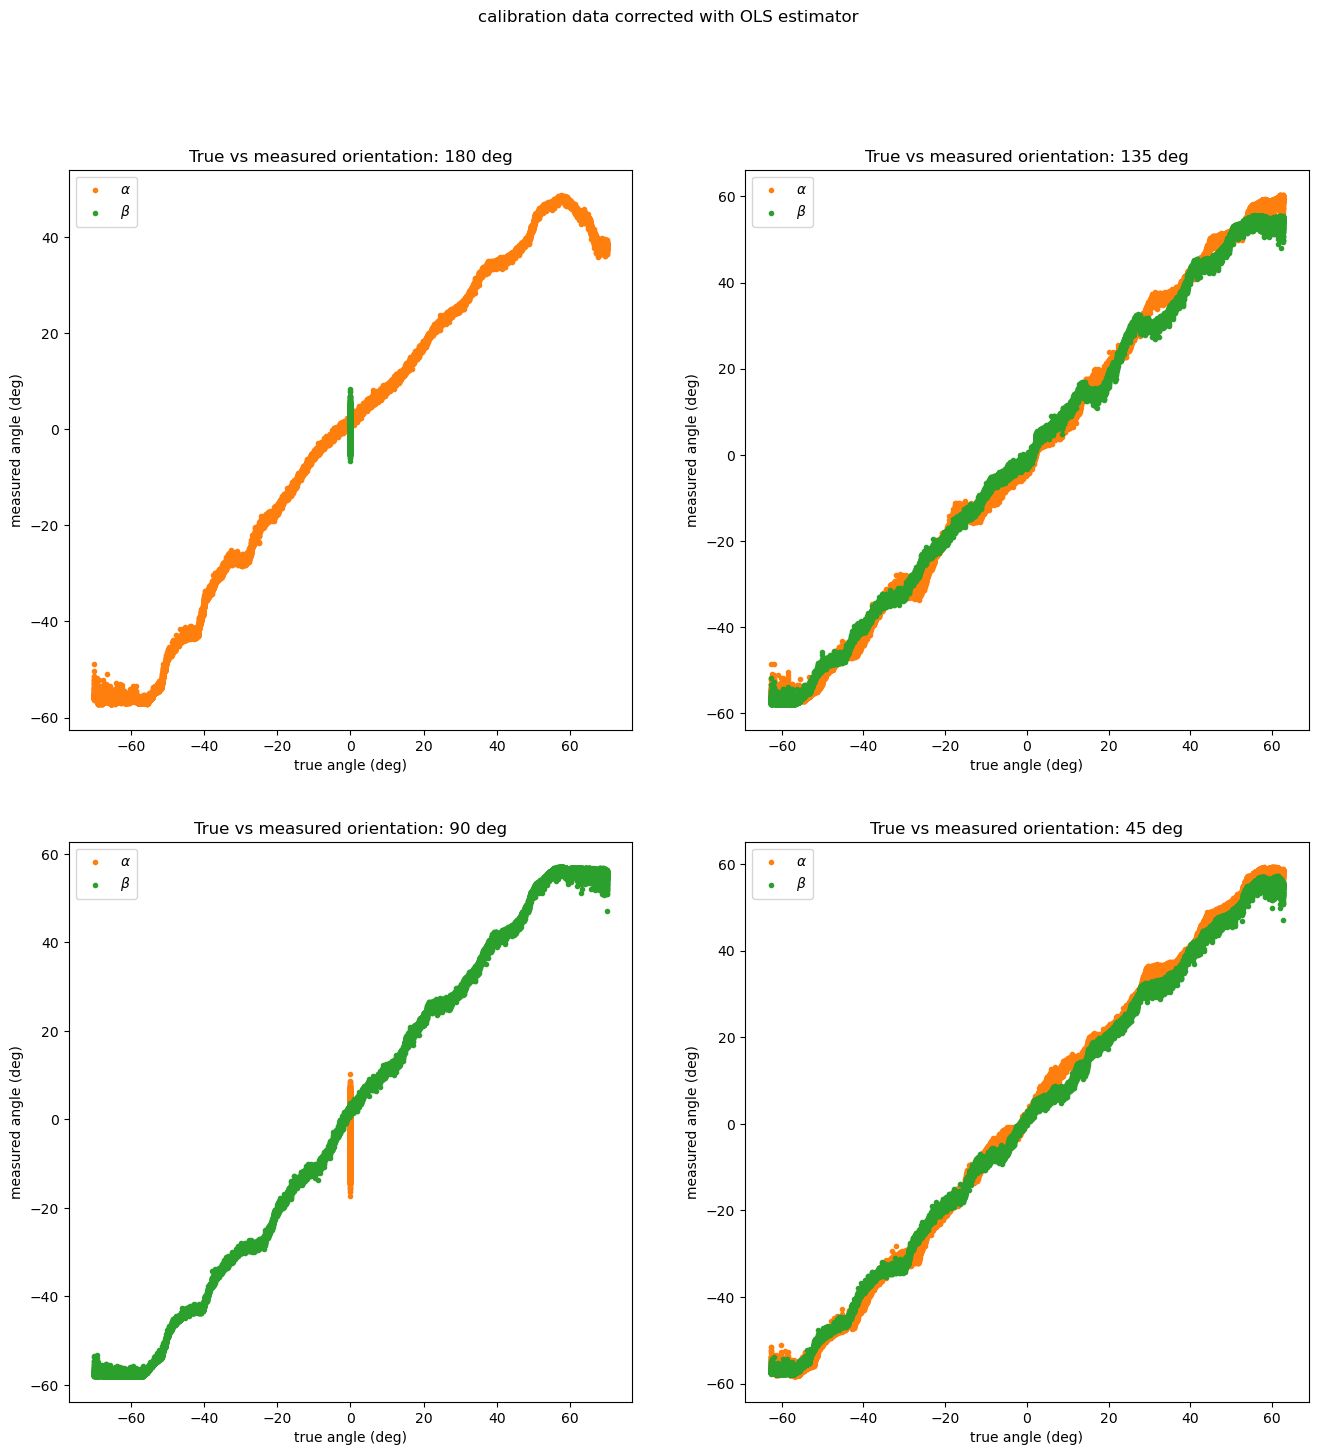

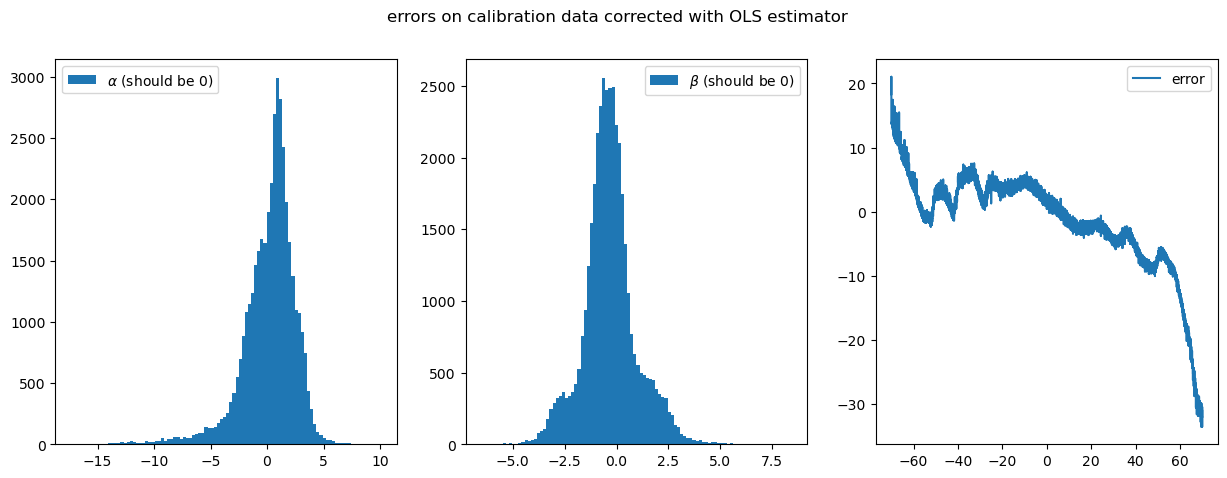

Average error accross


In [61]:

# apply the OLS to the test set and see how well it works
corrected_calbset_ols = apply_OLS(calb_data, estimator_alpha_1, estimator_beta_1, bias = True)

generic_angles(corrected_calbset_ols, "calibration data corrected with OLS estimator")
axis_errors(corrected_calbset_ols, "errors on calibration data corrected with OLS estimator")

Truth table based on nearest neighbors
No clue how to make a LUT in a practical manner. Copy paste?